In [1]:
df <- read.table("tidy.csv",header = TRUE, stringsAsFactors = TRUE, sep =" ")

In [2]:
head(df)

,activity,sex,meanx,meany,meanz,skewx,skewy,skewz,kurtx,kurty,kurtz,corxy,coryz,corxz
1,standup_chair,1,-3.577941,3.19708,7.293908,-0.02743029,0.1256692,-0.1331527,1.116679,1.511332,1.18265,-0.9221761,-0.9025038,0.9702177
2,sitdown_chair,1,-3.164217,4.258892,6.826107,-0.1194712,0.5794308,-0.1097923,1.106795,3.38443,1.248554,0.6679544,0.6425899,0.96022
3,pour_water,1,0.7739084,0.8936094,8.676544,0.4834989,-0.2466208,0.5049835,2.338528,1.282156,3.489376,0.7461314,0.1828762,0.1979201
4,drink_glass,1,2.300959,3.311903,8.927909,0.4539398,-0.8603673,0.2220048,1.78886,2.139986,3.773488,-0.8746166,0.007853708,-0.06172179
5,drink_glass,1,2.541931,3.663932,8.580743,0.2279045,-0.7378359,-1.342537,3.249835,2.044912,14.14306,-0.8632525,-0.2465573,0.2792758
6,standup_chair,1,-5.170489,5.108228,5.11284,0.9050761,0.9603296,0.6652821,1.96315,3.165712,1.744554,0.8518449,0.858185,0.956636


In [20]:
str(df)

'data.frame':	839 obs. of  14 variables:
 $ activity: Factor w/ 14 levels "brush_teeth",..: 12 11 10 5 5 12 11 10 5 10 ...
 $ sex     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ meanx   : num  -3.578 -3.164 0.774 2.301 2.542 ...
 $ meany   : num  3.197 4.259 0.894 3.312 3.664 ...
 $ meanz   : num  7.29 6.83 8.68 8.93 8.58 ...
 $ skewx   : num  -0.0274 -0.1195 0.4835 0.4539 0.2279 ...
 $ skewy   : num  0.126 0.579 -0.247 -0.86 -0.738 ...
 $ skewz   : num  -0.133 -0.11 0.505 0.222 -1.343 ...
 $ kurtx   : num  1.12 1.11 2.34 1.79 3.25 ...
 $ kurty   : num  1.51 3.38 1.28 2.14 2.04 ...
 $ kurtz   : num  1.18 1.25 3.49 3.77 14.14 ...
 $ corxy   : num  -0.922 0.668 0.746 -0.875 -0.863 ...
 $ coryz   : num  -0.9025 0.64259 0.18288 0.00785 -0.24656 ...
 $ corxz   : num  0.9702 0.9602 0.1979 -0.0617 0.2793 ...


In [4]:
require(caret)

Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2


## Applying PCA

In [14]:
pcaIndex <- preProcess(df[,-1], method="pca", pcaComp = 10)

In [15]:
pcaIndex

Created from 839 samples and 13 variables

Pre-processing:
  - centered (13)
  - ignored (0)
  - principal component signal extraction (13)
  - scaled (13)

PCA used 10 components as specified

In [16]:
pcaData <- predict(pcaIndex, newdata = df[,-1])

In [17]:
head(pcaData)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
1,1.175952,0.3469544,0.007250947,-0.5125103,-0.9728921,2.680068,1.289137,0.4530267,-0.2614165,-0.2671093
2,-0.2407407,-1.219423,-1.249249,-0.4464083,-0.4283068,-1.084784,1.851507,0.172224,0.5608606,0.1716424
3,0.8194959,0.09698268,0.1978843,-0.3152194,-0.1717758,-1.569175,1.577988,-1.261259,0.9528854,-0.6282308
4,1.782404,1.300967,0.5586057,-0.03747896,-1.030931,0.5415013,0.6982672,-0.5743325,1.495007,0.9583217
5,2.465975,1.696727,1.80596,1.272226,-1.090256,-0.3003602,1.00374,2.071886,0.3438006,1.203249
6,-1.633691,-1.562104,-1.261043,0.3030389,-0.214733,-1.158252,1.905987,-0.2082029,0.786904,0.4300468


In [12]:
require(ggplot2)

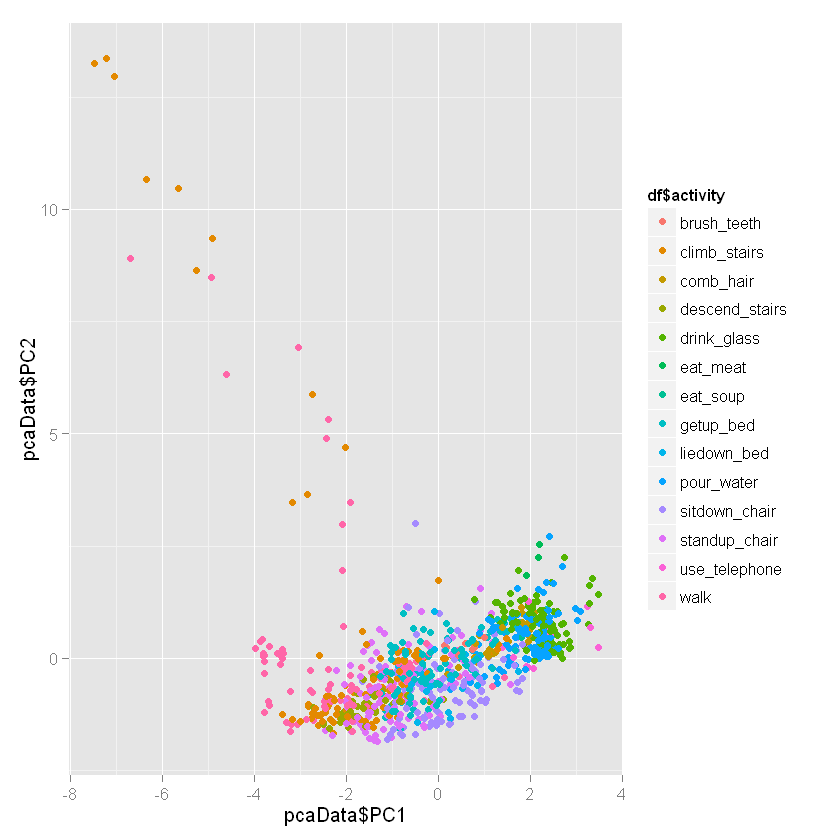

In [18]:
qplot(x=pcaData$PC1,y=pcaData$PC2, col= df$activity)

One of the great things about using PCA is that you can already see some nice clusters around.

## One more feature- FFT

In [1]:
require(dplyr)

Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
data_new <- read.table("data_combined.csv",sep=" ",header=TRUE, stringsAsFactors = TRUE)
        

In [3]:
head(data_new)
require(moments)

,V1,V2,V3,id,activity,date,time,sex
1,-4.436048,8.171667,1.634333,f1,brush_teeth,2011-04-11,13:28:18,0
2,-4.436048,8.171667,1.634333,f1,brush_teeth,2011-04-11,13:28:18,0
3,-4.436048,9.572524,1.634333,f1,brush_teeth,2011-04-11,13:28:18,0
4,-4.436048,9.572524,1.634333,f1,brush_teeth,2011-04-11,13:28:18,0
5,-4.903,9.572524,1.167381,f1,brush_teeth,2011-04-11,13:28:18,0
6,-4.436048,9.105571,1.167381,f1,brush_teeth,2011-04-11,13:28:18,0


Loading required package: moments


In [11]:
df_with_fft <- tidydata <- data_new %>%                
            group_by(time, activity, sex) %>%
                select(V1,V2,V3) %>%
                summarize(
                    meanx= mean(V1),
                    meany= mean(V2),
                    meanz= mean(V3),
                    skewx=skewness(V1),
                    skewy=skewness(V2),
                    skewz=skewness(V3),
                    kurtx=kurtosis(V1),
                    kurty=kurtosis(V2),
                    kurtz=kurtosis(V3),
                    corxy=cor(V1,V2),
                    coryz=cor(V2,V3),
                    corxz=cor(V1,V3),
                    e1=sum(Mod(fft(V1)))/32,
                    e2=sum(Mod(fft(V2)))/32,
                    e3=sum(Mod(fft(V3)))/32
                )

In [6]:
f <- sum(Mod(fft(data_new$V1[1:100])))

In [8]:
f/32

[1] 30.5627

In [9]:
f <- sum(Mod(fft(data_new$V1[100:200])))/32

In [10]:
f

[1] 34.90292

In [12]:
head(df_with_fft)

,time,activity,sex,meanx,meany,meanz,skewx,skewy,skewz,kurtx,kurty,kurtz,corxy,coryz,corxz,e1,e2,e3
1,03:44:39,standup_chair,1,-3.577941,3.19708,7.293908,-0.02743029,0.1256692,-0.1331527,1.116679,1.511332,1.18265,-0.9221761,-0.9025038,0.9702177,443.5277,266.0947,423.7009
2,03:45:26,sitdown_chair,1,-3.164217,4.258892,6.826107,-0.1194712,0.5794308,-0.1097923,1.106795,3.38443,1.248554,0.6679544,0.6425899,0.96022,472.6722,239.3231,372.4055
3,03:46:21,pour_water,1,0.7739084,0.8936094,8.676544,0.4834989,-0.2466208,0.5049835,2.338528,1.282156,3.489376,0.7461314,0.1828762,0.1979201,154.1541,264.91,217.2445
4,03:47:02,drink_glass,1,2.300959,3.311903,8.927909,0.4539398,-0.8603673,0.2220048,1.78886,2.139986,3.773488,-0.8746166,0.007853708,-0.06172179,114.9052,155.6867,143.5032
5,03:47:36,drink_glass,1,2.541931,3.663932,8.580743,0.2279045,-0.7378359,-1.342537,3.249835,2.044912,14.14306,-0.8632525,-0.2465573,0.2792758,174.865,211.0282,192.7282
6,03:48:20,standup_chair,1,-5.170489,5.108228,5.11284,0.9050761,0.9603296,0.6652821,1.96315,3.165712,1.744554,0.8518449,0.858185,0.956636,402.6098,216.1527,250.1744


In [18]:
require(ggplot2)
df_with_fft$time <- NULL

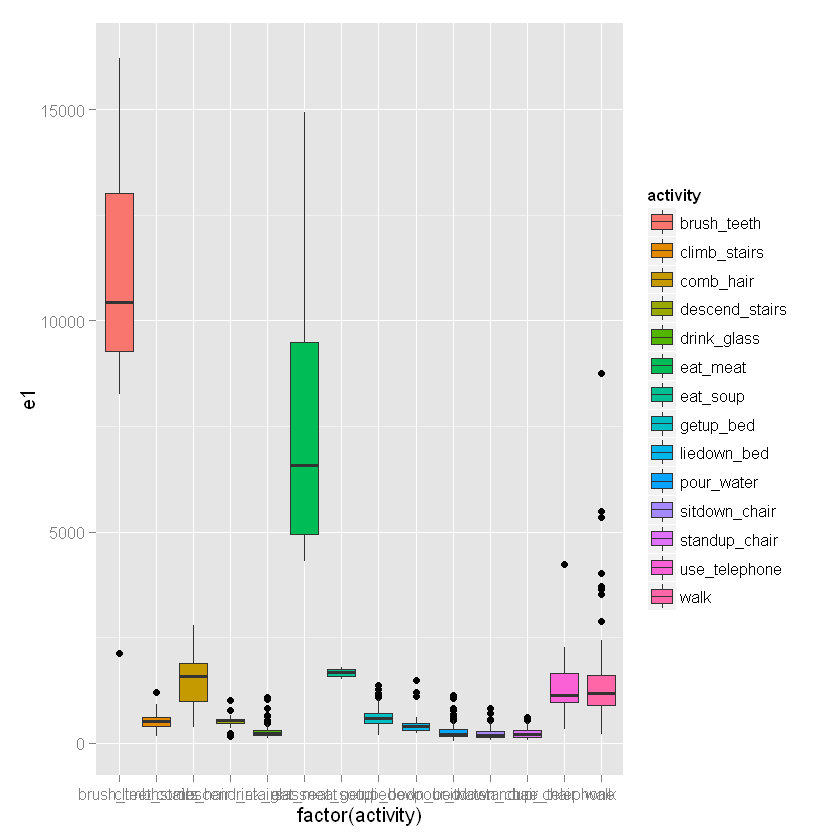

In [14]:
g = ggplot(df_with_fft, aes(factor(activity),e1))
g+ geom_boxplot(aes(fill= activity))

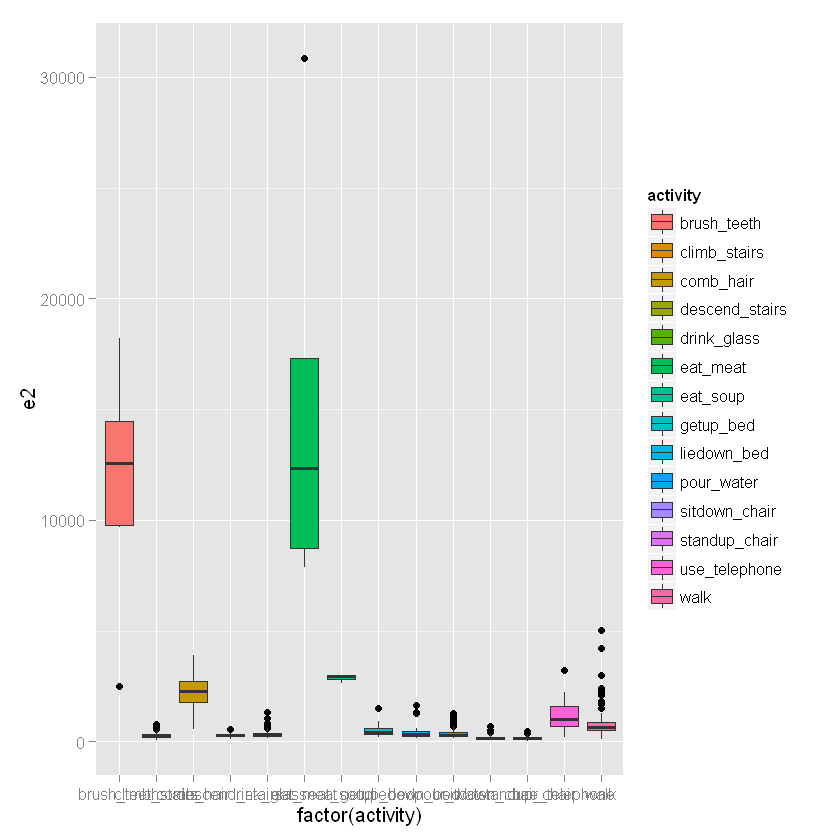

In [15]:
g = ggplot(df_with_fft, aes(factor(activity),e2))
g+ geom_boxplot(aes(fill= activity))

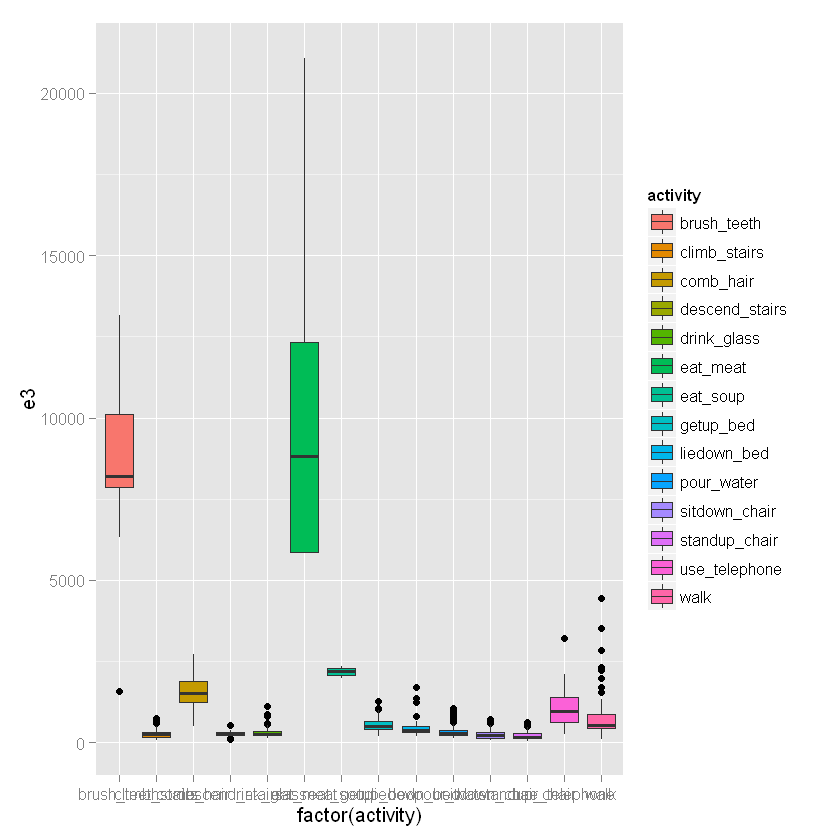

In [16]:
g = ggplot(df_with_fft, aes(factor(activity),e3))
g+ geom_boxplot(aes(fill= activity))

It looks like there is some signature, not really sure.

In [19]:
head(df_with_fft)

,activity,sex,meanx,meany,meanz,skewx,skewy,skewz,kurtx,kurty,kurtz,corxy,coryz,corxz,e1,e2,e3
1,standup_chair,1,-3.577941,3.19708,7.293908,-0.02743029,0.1256692,-0.1331527,1.116679,1.511332,1.18265,-0.9221761,-0.9025038,0.9702177,443.5277,266.0947,423.7009
2,sitdown_chair,1,-3.164217,4.258892,6.826107,-0.1194712,0.5794308,-0.1097923,1.106795,3.38443,1.248554,0.6679544,0.6425899,0.96022,472.6722,239.3231,372.4055
3,pour_water,1,0.7739084,0.8936094,8.676544,0.4834989,-0.2466208,0.5049835,2.338528,1.282156,3.489376,0.7461314,0.1828762,0.1979201,154.1541,264.91,217.2445
4,drink_glass,1,2.300959,3.311903,8.927909,0.4539398,-0.8603673,0.2220048,1.78886,2.139986,3.773488,-0.8746166,0.007853708,-0.06172179,114.9052,155.6867,143.5032
5,drink_glass,1,2.541931,3.663932,8.580743,0.2279045,-0.7378359,-1.342537,3.249835,2.044912,14.14306,-0.8632525,-0.2465573,0.2792758,174.865,211.0282,192.7282
6,standup_chair,1,-5.170489,5.108228,5.11284,0.9050761,0.9603296,0.6652821,1.96315,3.165712,1.744554,0.8518449,0.858185,0.956636,402.6098,216.1527,250.1744


In [22]:
write.table(df_with_fft,"featuresextracted.csv",sep=" ", row.names= FALSE)

## TO DO: Models